# Rank chart
 America's most popular sports

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy.stats import rankdata

In [67]:
#load data
df = pd.read_excel("Data.xlsx")

#remove 'Other' category
df = df[df["Sport"]!='Other']

# create ranks
data = pd.melt(df, id_vars = "Sport", var_name="Year", value_name="Percent")
data["rank"] = data.groupby("Year")["Percent"].transform(lambda x: rankdata(-x))

#where multiple sports in rank, round down
data["rank"] = data["rank"].apply(np.floor)

#remove where rank less than 10
data = data[data["rank"]<=5]

In [71]:
SPORTS = data["Sport"].unique()
SPORT = SPORTS[0]

In [100]:
def add_label(x,y,perc,label, fontsize, ax):
    PAD = 0.4
    ax.annotate(
        f"{label}\n#{int(y)} ({int(perc)}%)", 
        xy=(x + PAD, y), 
        ha="left", 
        va="center",
        fontsize=fontsize,
        zorder=12
    )

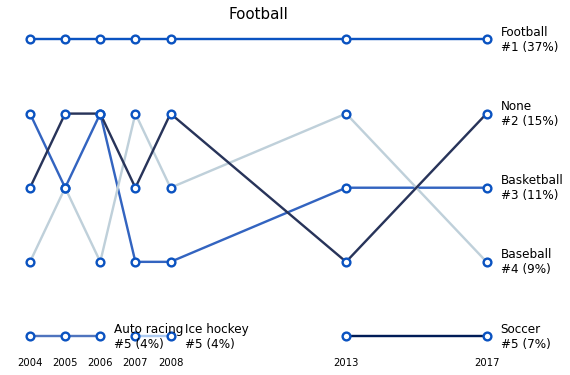

In [101]:
colours = {'Football': "#0b53c1", 'Basketball': "#3364c0", 'Baseball': "#bfd0da", 'Soccer': "#001c57",
           'None':"#28345a",'Ice hockey':"#adcbf1", 'Auto racing':"#4f74be" }

# Initialize figure and axis
fig, ax = plt.subplots(figsize=(9, 6))

# Invert vertical axis to show rank 1 on top
ax.invert_yaxis()

# Loop through countries
for sport in SPORTS:
    
    # Filter data to keep rows of the country
    d = data[data["Sport"] == sport] 
    x = d["Year"].values
    y = d["rank"].values
    perc = d["Percent"].values
    
    ax.plot(x, y, color=colours[sport], lw=2.4, zorder=10)
    ax.scatter(x, y, fc="w", ec="#0b53c1", s=60, lw=2.4, zorder=12)   
        
    # Pass the first and last values to the add_label function
    add_label(x[0], y[0],perc[0], sport, 12, ax)
        
# Remove vertical ticks
ax.set_yticks([])

# Set location of horizontal ticks
ax.set_xticks([2004, 2005, 2006, 2007, 2008, 2013, 2017])

# Remove tick marks in bottom horizontal axis
ax.tick_params(bottom=False)

# Remove the frame
ax.set_frame_on(False)

# Add a title
ax.set_title(SPORT,fontsize=15, fontweight=500);